In [3]:
# These two lines will tell jupyter to automatically reload external libraries
# if they have been changed.
%reload_ext autoreload
%autoreload 2

from optimization_utilities import get_random_permutation
from optimization_utilities import get_random_permutation_neighbor

import numpy as np
import matplotlib.pyplot as plt

from functools import partial

In [4]:
def simulated_annealing(problem_size, num_iters, max_temp, temp_change,
                        cost_fcn):
    """Perform a simulated annealing optimization on a permutation problem.
    
    Args:
        problem_size (int): number of elements in the permutation
        num_iters (int): number of iterations to perform
        max_temp (float): the maximum (initial) temperature
        temp_change (float): a factor used to exponentially reduce the 
            temperature (should be in the range (0, 1))
        cost_fcn ([int] -> float): a function that returns the cost of a given
            permutation
    
    Return:
        The best permutation and its cost
    """
    
    curr_perm = get_random_permutation(problem_size)
    curr_cost = cost_fcn(curr_perm)

    best_perm = curr_perm.copy()
    best_cost = curr_cost

    temp = max_temp
    for it in range(num_iters):
        new_perm = get_random_permutation_neighbor(curr_perm)
        new_cost = cost_fcn(new_perm)

        temp *= temp_change

        if new_cost <= curr_cost or np.exp(
            (curr_cost - new_cost) / temp) > np.random.random():
            curr_perm = new_perm.copy()
            curr_cost = new_cost

        if new_cost < best_cost:
            best_perm = new_perm.copy()
            best_cost = new_cost

        if (it + 1) % 100 == 0:
            print(f"{it:>4}: temp={temp}, best={best_cost}")
    
    return best_perm, best_cost

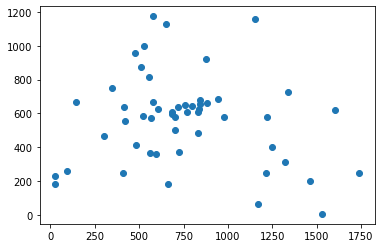

In [14]:
# Example taken from:
# http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/berlin52.tsp
cities = np.array([
    [565, 575], [25, 185], [345, 750], [945, 685], [845, 655],
    [880, 660], [25, 230], [525, 1000], [580, 1175], [650, 1130],
    [1605, 620], [1220, 580], [1465, 200], [1530, 5], [845, 680],
    [725, 370], [145, 665], [415, 635], [510, 875], [560, 365],
    [300, 465], [520, 585], [480, 415], [835, 625], [975, 580],
    [1215, 245], [1320, 315], [1250, 400], [660, 180], [410, 250], 
    [420, 555], [575, 665], [1150, 1160], [700, 580], [685, 595], 
    [685, 610], [770, 610], [795, 645], [720, 635], [760, 650], 
    [475, 960], [95, 260], [875, 920], [700, 500], [555, 815], 
    [830, 485], [1170, 65], [830, 610], [605, 625], [595, 360], 
    [1340, 725], [1740, 245]
])

plt.scatter(x=cities[:,0], y=cities[:,1]);

In [6]:
def cost_of_tour(coordinates, visit_order):
    """Compute the cost of a closed tour.
    
    Args:
        coordinates ([[float]]): a list of coordinates
        visit_order ([int]): the tour order

    Return:
        The cost of the closed tour.
    """

    cost = np.linalg.norm(coordinates[-1] - coordinates[0])
    for i, j in zip(visit_order, visit_order[1:]):
        cost += np.linalg.norm(coordinates[i] - coordinates[j])
    return cost


# A partial function application so that we can pass cost_of_tour as a function
# that has only one argument.
cost_fcn = partial(cost_of_tour, cities)

In [17]:
num_iterations = 2000
problem_size = len(cities)
max_temp = 100000
temp_change = 0.98

best = simulated_annealing(problem_size, num_iterations, max_temp, temp_change,
                           cost_fcn)
print("Done.")

  99: temp=13261.9555894753, best=27263.566052831888
 199: temp=1758.7946605721513, best=26050.492305723972
 299: temp=233.2505667951414, best=26050.492305723972
 399: temp=30.933586580571077, best=21978.454597134678
 499: temp=4.102398514547225, best=16756.580448834928
 599: temp=0.5440582691025477, best=15008.46994211093
 699: temp=0.07215276602924785, best=14416.09811361343
 799: temp=0.009568867787376869, best=12767.923339846684
 899: temp=0.0012690189963775282, best=12499.922082318433
 999: temp=0.00016829673572159285, best=11984.131281834907
1099: temp=2.2319438349934263e-05, best=11504.945239204339
1199: temp=2.9599940017885985e-06, best=10974.485577972633
1299: temp=3.925530899683367e-07, best=10824.365833500011
1399: temp=5.20602164567138e-08, best=10440.590748005616
1499: temp=6.9042027862740936e-09, best=10393.881437704858
1599: temp=9.156323073229862e-10, best=10102.382300072743
1699: temp=1.2143074996006234e-10, best=9781.986943440239
1799: temp=1.6104092131670253e-11, bes

In [8]:
# Things to do:
# (0) Plot temperature vs iteration
# (1) Plot the best tour
# (2) Perform replicate experiments
# (3) Compare cost vs iteration for all replicates
# (4) Try different hyper parameter values
# (5) Compare best tours for different replicates

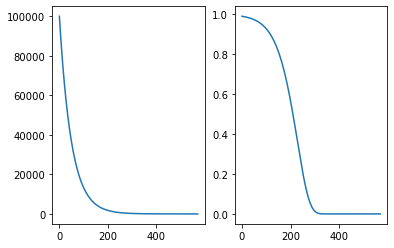

In [9]:
# (0) Plot temperature vs iteration

temp = max_temp
temperature = [temp]
chance = [np.exp(-1000/temp)]
for _ in range(num_iterations):
    temp *= temp_change
    temperature.append(temp)
    chance.append(np.exp(-1000/temp))
    if temp < 1:
        break

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(temperature);
ax2.plot(chance);

In [19]:
# (1) Plot the best tour

best_tour = best[0]

# city1_index = best_tour[0]
# city1_coordinates = cities[city1_index]
# city1_xvalue = city1_coordinates[0]
x_coords = []
y_coords = []
for city_index in best_tour:
    city_coords = cities[city_index]
    city_xvalue, city_yvalue = city_coords
    
    x_coords.append(city_xvalue)
    y_coords.append(city_yvalue)
    
x_coords.append(cities[best_tour[0]][0])
y_coords.append(cities[best_tour[0]][1])

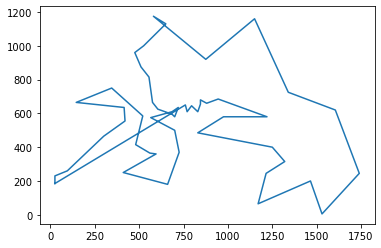

In [20]:
plt.plot(x_coords, y_coords);

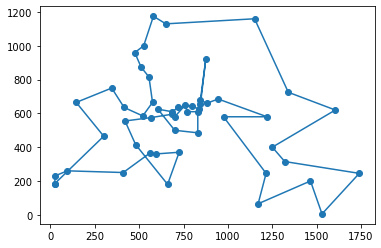

In [12]:
# (1) Plot the best tour

best_tour = best[0]
best_cost = best[1]

x = [cities[i][0] for i in best_tour] + [cities[best_tour[0]][0]]
y = [cities[i][1] for i in best_tour] + [cities[best_tour[0]][1]]
plt.plot(x, y, 'o-');